## Ejercicios de pair programming 26 enero: Random Forest

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal y a un Decision Tree. El objetivo de hoy es:

- Ajustar el modelo a un Random Forest.
- Extraer las métricas.
- Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas).

In [2]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Barra de progreso de un proceso
from tqdm import tqdm

# Configuración warnings

import warnings
warnings.filterwarnings('once')

In [3]:
# Abrimos nuestro DataFrame
df = pd.read_csv("archive/encoding.csv", index_col = 0)
df.reset_index(inplace= True)

In [4]:
df.drop(["region", "region.1"], axis = 1, inplace = True)
df.head()

,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,dystopia_residual,region_Australia and New Zealand,region_Central and Eastern Europe,region_Eastern Asia,region_Latin America and Caribbean,region_Middle East and Northern Africa,region_North America,region_Southeastern Asia,region_Southern Asia,region_Sub-Saharan Africa,region_Western Europe
0,-0.993631,7.587,0.667797,1.184471,0.817892,1.142818,2.674027,0.488939,0.450617,0,0,0,0,0,0,0,0,0,1
1,-0.980892,7.561,0.519256,1.336192,0.835310,0.976182,0.301121,1.360830,0.722398,0,0,0,0,0,0,0,0,0,1
2,-0.968153,7.527,0.555780,1.216329,0.636395,1.069507,3.217869,0.767717,0.413316,0,0,0,0,0,0,0,0,0,1
3,-0.955414,7.522,0.766346,1.131058,0.665118,1.161655,2.207255,0.802712,0.373969,0,0,0,0,0,0,0,0,0,1
4,-0.942675,7.427,0.557057,1.107057,0.720608,0.995200,1.904941,1.497125,0.354023,0,0,0,0,0,1,0,0,0,0


In [5]:
X = df.drop("happiness_score", axis = 1)
y = df["happiness_score"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
param = {"max_depth": [2,4], 
        "max_features": [1,2,3,4], 
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [17]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), 
            param_grid= param, 
            cv=10, 
            verbose=-1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error") 

In [18]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [19]:
bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=4, max_features=4, min_samples_leaf=10,
                      min_samples_split=10)

In [ ]:
# for arbol in tqdm(bosque.estimators_):
    #fig = plt.figure(figsize=(40, 20))
    #tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
    #plt.show()

In [20]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [21]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [22]:
dt_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
dt_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.249912,0.099813,0.315932,0.932419,test,Random Forest
1,0.208073,0.087330,0.295516,0.930383,train,Random Forest


In [25]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )

importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,happiness_rank,0.359651
3,health,0.137866
1,economy,0.121629
16,region_Sub-Saharan Africa,0.106155
7,dystopia_residual,0.081107
4,freedom,0.068475
2,family,0.058547
5,trust,0.036708
6,generosity,0.011505
11,region_Latin America and Caribbean,0.007897


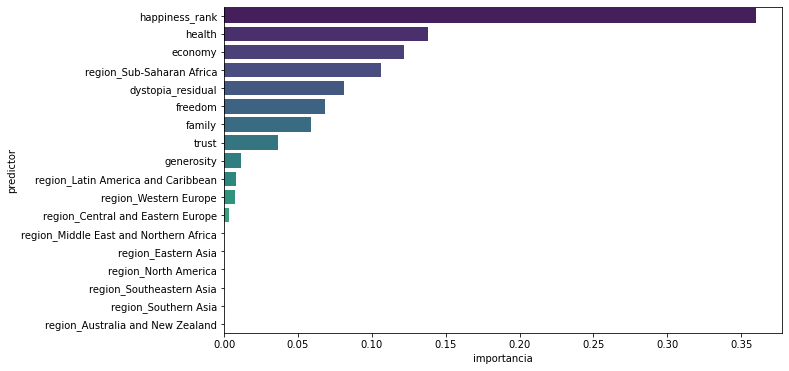

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

Viendo la gráfica, vemos cómo las variables que más afectan a nuestro resultado es el ranking de felicidad por países, y la esperanza de vida.

### **Comparación de modelos: Decision Tree y Random Forest**

Teniendo en cuenta que nuestros datos no son un buen ejemplo para este tipo de ejercicios, puesto que la variable respuesta es la suma de las variables predictoras, hemos rebajado la profundida tanto en el modelo de Decision Tree como en el Random Forest, para conseguir un resultado menos ajustado.

Las dos métricas son muy buenas en los dos casos, pero la mejor sería la de Random Forest, puesto que la métrica es superior a 0.90. 